In [1]:
%matplotlib inline

import numpy as np
import time

from AutoLinearModel.AutoDataProcessor import AutoDataProcessor
from AutoLinearModel.Fitter import Fitter
from AutoLinearModel.utility import generateRandomData

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X, y = generateRandomData(n=100)

x4 = 3 * x2 - x1
y = -x0 + x1**4 + x2 + 0 * x3 + x4 + x5


In [3]:
AutoDataProcessorObj = AutoDataProcessor(X, y)

variableNameList ['x0' 'x1' 'x2' 'x3' 'x4']


                                   Assumption 1
------------------------------------------------------------------------------------------
Assumption: The degrees of freedom should be larger than 0, is not violated.
                                   Assumption 2
------------------------------------------------------------------------------------------
Assumption: The relationship between the independent and dependent variables to be linear, is violated.
Recommended remedies: Transform or remove independent variablesOf features:
['x1' 'x3']
                                   Assumption 3
------------------------------------------------------------------------------------------
Assumption: There should not be collinearity among independent variables, is violated.
Recommended remedies: Transform or remove independent variablesOf features whose VIF > 1.
		VIF = 1 (Not correlated);
		1 < VIF < 5 (Moderately correlated);
		VIF >=5 (Highly correlated)
vifList:
[ 1.01034104  2.42025906 12.462

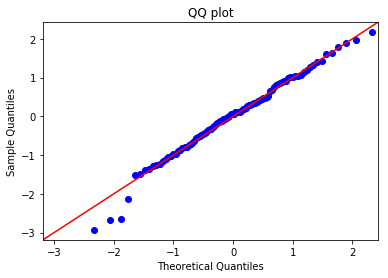

Assumption: The residuals of the model should be normally distributed, is not violated.
                                   Assumption 5
------------------------------------------------------------------------------------------
Assumption: The mean of the residuals should be zero, is not violated.
                                   Assumption 6
------------------------------------------------------------------------------------------


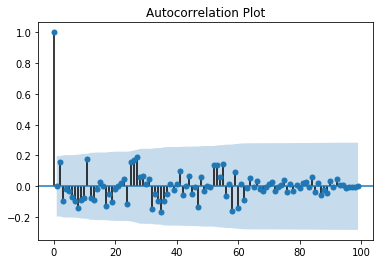

Implement Durbin Watson to checke the autocorrelation.
Assumption: The residuals of the model should be independent, is violated.
Recommended remedies: Use a time series model rather than a linear regression model to model the data
                                   Assumption 7
------------------------------------------------------------------------------------------


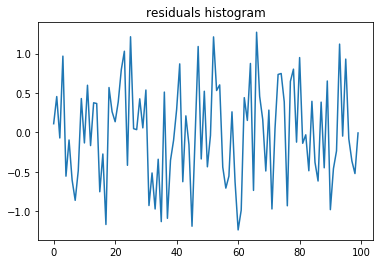

Use Levene test because it is less sensitive than the Bartlett test to departures from normality.
Assumption: The residuals should have constant variance, is not violated.


In [4]:
AutoDataProcessorObj.checkAssumptions()

In [5]:
X_new = AutoDataProcessorObj.autoTransformation()

No transformation of data
other also violated, add interaction and power
selected features are: ['x4', 'x0', 'x2']


In [6]:
fitter = Fitter()
fitter.fit(X_new, y, return_params=True)
y_pred = fitter.predict(X_new)

fitter.summary()

Utilizing matrix to fit data


'Regression summary with matrix fit_method'

,SSE,AIC,BIC,R_squared,R_squared_adjusted,DurbinWatson,F_stat,F_stat P_value,ConditionNum
value,39.905568,-85.865433,-78.049922,0.936357,0.921126,0.0,470.802034,1.0,7.622756


,beta_0,beta_1,beta_2,beta_3
lower_bound,0.088858,0.739917,-1.121118,0.875046
upper_bound,0.346453,1.063653,-0.647190,1.866243
